In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('games.csv')
data.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [4]:
data.shape
#data.columns

(51490, 61)

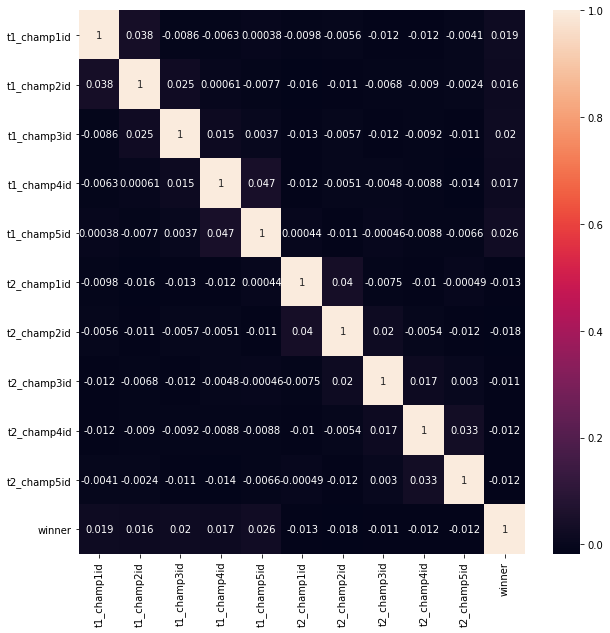

In [5]:
#Correlações dos campeões em jogo
fig = plt.figure(figsize=(10,10))
sns.heatmap(data[['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id', 
                  't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id', 'winner']].corr(), annot=True)

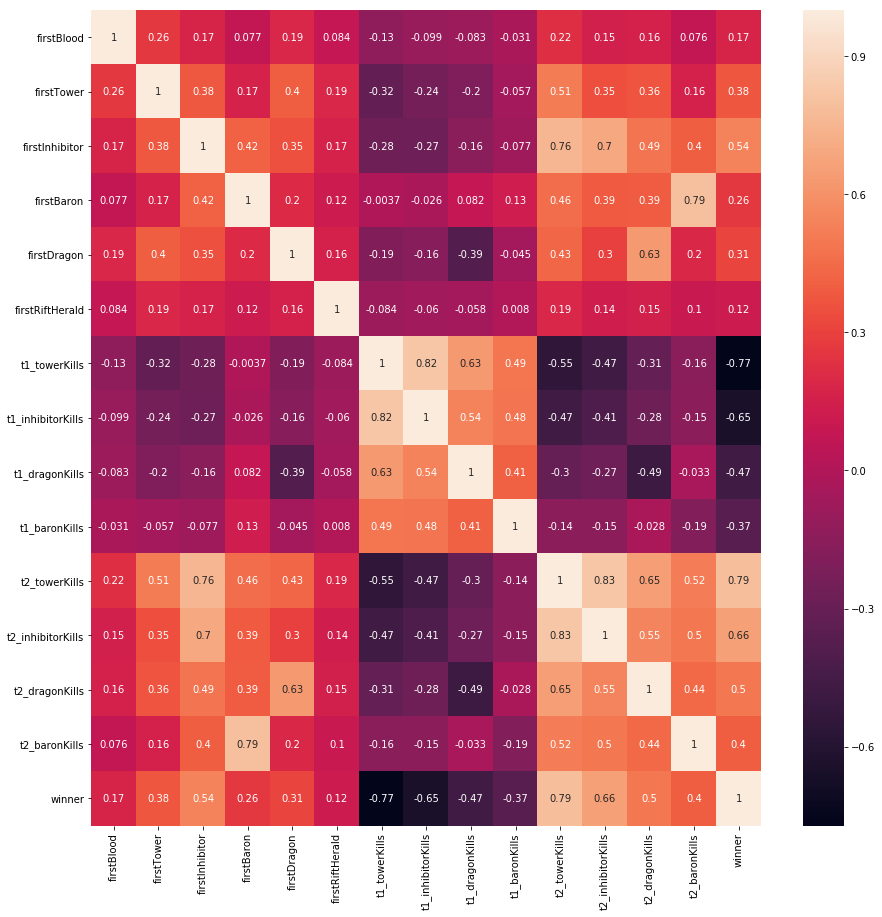

In [6]:
#Correlações dos objetivos do jogo
fig = plt.figure(figsize=(15,15))
sns.heatmap(data[['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_dragonKills', 't1_baronKills', 
                  't2_towerKills', 't2_inhibitorKills', 't2_dragonKills', 't2_baronKills', 'winner']].corr(), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [8]:
#Testando a partir de monstros de objetivos mortos (qtd de Barão e Dragão)
x = data[['t1_baronKills', 't1_dragonKills', 't2_baronKills', 't2_dragonKills']]
y = data['winner']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

NameError: name 'train_test_split' is not defined

In [62]:
#Testando a partir de objetivos destruidos (qtd de Torres e Inibidores)
x = data[['t1_towerKills', 't1_inhibitorKills', 't2_towerKills', 't2_inhibitorKills']]
y = data['winner']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96     10470
           2       0.97      0.94      0.96     10126

   micro avg       0.96      0.96      0.96     20596
   macro avg       0.96      0.96      0.96     20596
weighted avg       0.96      0.96      0.96     20596



In [63]:
#Testando a partir de objetivos destruidos (construções e monstros)
x = data[['t1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills'
         ,'t2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills']]
y = data['winner']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96     10399
           2       0.97      0.95      0.96     10197

   micro avg       0.96      0.96      0.96     20596
   macro avg       0.96      0.96      0.96     20596
weighted avg       0.96      0.96      0.96     20596



In [58]:
#Testando a partir de marcos (primeira torre, primeira morte e primeiros monstros)
x = data[['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']]
y = data['winner']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           1       0.82      0.84      0.83     10434
           2       0.83      0.81      0.82     10162

   micro avg       0.83      0.83      0.83     20596
   macro avg       0.83      0.83      0.83     20596
weighted avg       0.83      0.83      0.83     20596



In [59]:
#Testando a partir de marcos (primeira torre e primeiro inibidor)
x = data[['firstTower', 'firstInhibitor']]
y = data['winner']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           1       0.83      0.92      0.87     10479
           2       0.91      0.80      0.85     10117

   micro avg       0.86      0.86      0.86     20596
   macro avg       0.87      0.86      0.86     20596
weighted avg       0.87      0.86      0.86     20596

